/var/folders/pb/_0h8x45x091307x0pwzykw8h0000gn/T/ipykernel_79873/2433061539.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


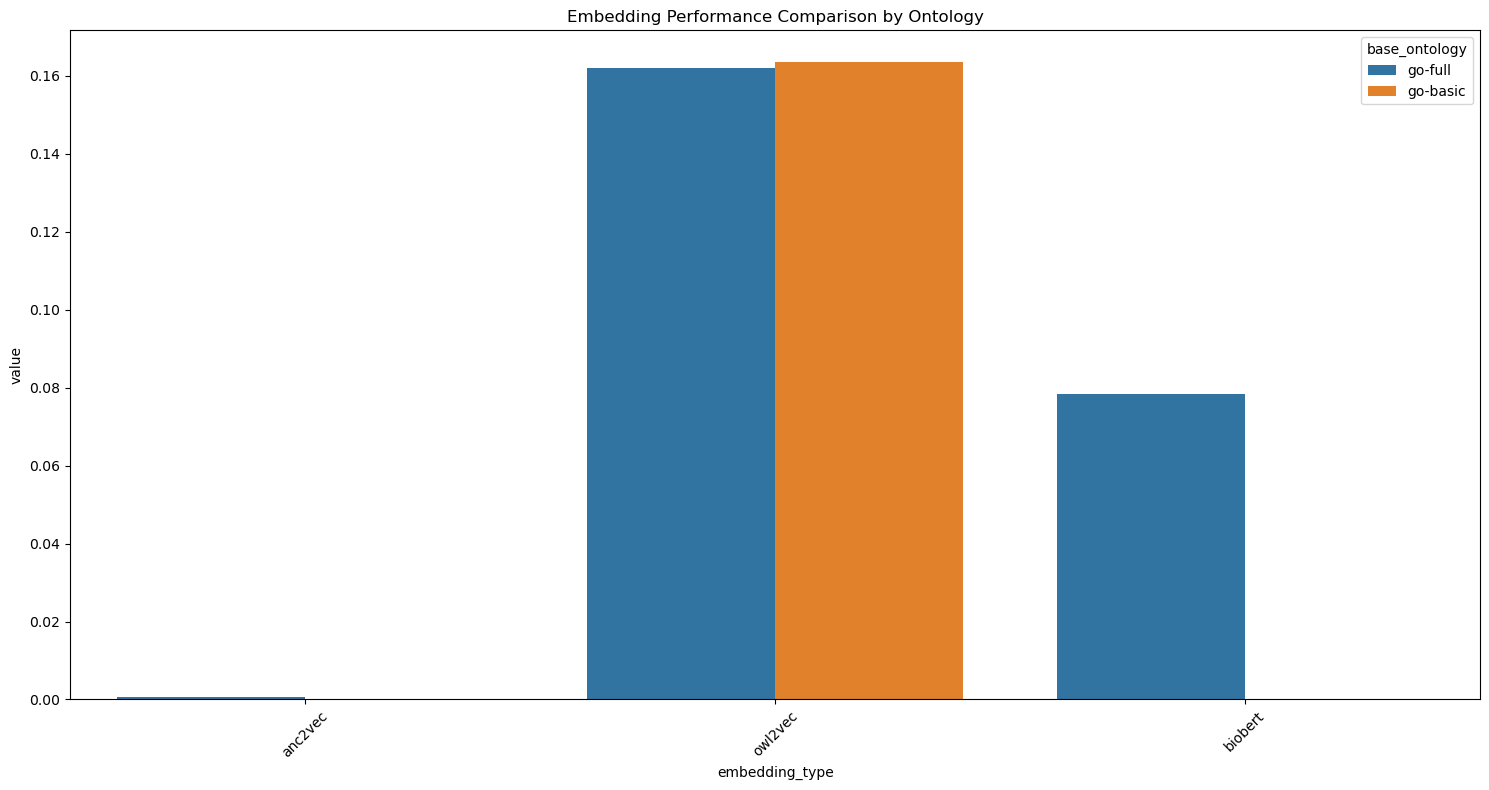


Detailed Results:
metric                                               Hits@1  Hits@10  Hits@5  \
base_ontology embedding_type model                                             
go-basic      anc2vec        torch_mlp                  NaN      NaN     NaN   
              biobert        torch_mlp                  NaN      NaN     NaN   
              owl2vec        MLPClassifier            0.043    0.303   0.184   
go-full       anc2vec        DecisionTreeClassifier   0.000    0.001   0.000   
              biobert        MLPClassifier            0.016    0.155   0.077   
              owl2vec        MLPClassifier            0.042    0.301   0.183   

metric                                                 MRR   epoch  \
base_ontology embedding_type model                                   
go-basic      anc2vec        torch_mlp                 NaN   3.333   
              biobert        torch_mlp                 NaN  34.000   
              owl2vec        MLPClassifier           0.125  

In [4]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict

# Initialize wandb
api = wandb.Api()

# Get runs from your project
runs = api.runs("go-embedding-evaluation")  # Replace with your actual project name

# Collect data
data = []
for run in runs:
    config = run.config
    # Get the last logged metrics
    history = run.history()
    if not history.empty:
        metrics = history.iloc[-1].to_dict()

        # Extract metrics for each embedding type and model
        for key, value in metrics.items():
            if isinstance(value, (int, float)):  # Filter out non-numeric values
                # Parse the metric key (format: "embedding_type/model/metric")
                parts = key.split('/')
                if len(parts) == 3:
                    embedding_type, model, metric = parts
                    data.append({
                        'base_ontology': config.get('base_ontology', 'unknown'),
                        'embedding_type': embedding_type,
                        'model': model,
                        'metric': metric,
                        'value': value
                    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Create visualization
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df[df['metric'].isin(['MRR', 'Hits@1', 'Hits@5', 'Hits@10'])],
    x='embedding_type',
    y='value',
    hue='base_ontology',
    ci=None
)
plt.title('Embedding Performance Comparison by Ontology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create summary table
summary_table = df.pivot_table(
    index=['base_ontology', 'embedding_type', 'model'],
    columns='metric',
    values='value',
    aggfunc='mean'
).round(3)

# Display the table
print("\nDetailed Results:")
print(summary_table)

# Optionally save to CSV
summary_table.to_csv('embedding _evaluation_results.csv')